# Определение перспективного тарифа для телеком-компании

## Описание проекта

Клиентам компании «Мегалайн» предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено:
 * 500 минут разговора,
 * 50 сообщений,
 * 15 Гб интернет-трафика.
3. Стоимость услуг сверх тарифного пакета:
 * минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 
 * сообщение: 3 рубля;
 * 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено:
 * 3000 минут разговора,
 * 1000 сообщений,
 * 30 Гб интернет-трафика.
3. Стоимость услуг сверх тарифного пакета:
 * минута разговора: 1 рубль;
 * сообщение: 1 рубль;
 * 1 Гб интернет-трафика: 150 рублей.


## План работы
1. Открыть файлы с данными и изучить общую информацию
 * /datasets/calls.csv
 * /datasets/internet.csv
 * /datasets/messages.csv
 * /datasets/tariffs.csv
 * /datasets/users.csv

2. Подготовить данные
    1. Привести данные к нужным типам
    2. Найти и исправить ошибки в данных, если они есть
    3. Выполнить расчёт для каждого пользователя:
        1. количество сделанных звонков и израсходованных минут разговора по месяцам
        2. количество отправленных сообщений по месяцам
        3. объем израсходованного интернет-трафика по месяцам
        4. помесячную выручку с каждого пользователя
3. Проанализировать данные
    1. Выполнить описание клиентов, исходя из выборки по объёмам минут, смс и трафика: среднее, дисперсия и стандартное отклонение.
    2. Построить гистограммы и описать распределения
4. Выполнить проверку двух гипотез
    1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
    2. Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов
5. Общий вывод

## Знакомство с данными

### Загрузка данных

In [1]:
# Импорт необходимых в работе библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import math
from scipy import stats as st

In [2]:
# Функция, выводящая основную информацию по таблице
def acquaintance(df):
    display(df.sample(5))  # случайные 5 строк
    print(df.info())  # общая информация
    display(df.describe().T)  # описание по числовым значениям
    print('Пропуски:')
    print(df.isna().sum())
    print()
    print('Дубликаты:', df.duplicated().sum())

#### Таблица `calls`

Таблица должна быть представлена столбцами:
1. id — уникальный номер звонка
2. call_date — дата звонка
3. duration — длительность звонка в минутах
4. user_id — идентификатор пользователя, сделавшего звонок

In [3]:
calls = pd.read_csv('/datasets/calls.csv')
acquaintance(calls)

,id,call_date,duration,user_id
196998,1482_365,2018-07-23,0.00,1482
66789,1169_248,2018-09-21,0.00,1169
90852,1227_272,2018-04-18,0.00,1227
26283,1065_370,2018-03-14,6.40,1065
135611,1346_161,2018-07-06,3.54,1346


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


Пропуски:
id           0
call_date    0
duration     0
user_id      0
dtype: int64

Дубликаты: 0


В рамках предварительного анализа:
1. В представленной таблице отсутствуют пропуски данных
2. Продолжительность звонков составляет от 0 до 38 минут, что выглядит адекватным.
3. Пользователи представлены с id от 1000 до 1499.
4. В таблице требуется привести дату звонка к формату datetime

#### Таблица `internet`

Таблица должна быть представлена столбцами:
1. id — уникальный номер сессии
2. mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
3. session_date — дата интернет-сессии
4. user_id — идентификатор пользователя

In [4]:
internet = pd.read_csv('/datasets/internet.csv')
acquaintance(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
105642,105642,1357_69,130.56,2018-09-08,1357
123936,123936,1416_198,507.48,2018-11-30,1416
96495,96495,1325_154,785.26,2018-08-17,1325
73952,73952,1249_111,82.17,2018-12-10,1249
3405,3405,1011_272,753.97,2018-09-14,1011


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


Пропуски:
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Дубликаты: 0


В рамках предварительного анализа:
1. В представленной таблице отсутствуют пропуски данных
2. Объём потраченного за сессию трафика составляет от 0 до 1724 MB, что выглядит адекватным.
3. Пользователи представлены с id от 1000 до 1499.
4. В таблице требуется удалить стоблец `Unnamed:0`, так как он дублирует индексы и перевести столбец `session_date` в формат datetime.

#### Таблица `messages`

Таблица должна быть представлена столбцами:
1. id — уникальный номер сообщения
2. message_date — дата сообщения
3. user_id — идентификатор пользователя, отправившего сообщение

In [5]:
messages = pd.read_csv('/datasets/messages.csv')
acquaintance(messages)

,id,message_date,user_id
99050,1404_190,2018-12-18,1404
32796,1145_449,2018-12-07,1145
60503,1266_111,2018-07-21,1266
80719,1337_37,2018-05-10,1337
77354,1325_93,2018-09-11,1325


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


Пропуски:
id              0
message_date    0
user_id         0
dtype: int64

Дубликаты: 0


В рамках предварительного анализа:
1. В представленной таблице отсутствуют пропуски данных
2. Пользователи представлены с id от 1000 до 1499.
4. В таблице требуется перевести столбец `message_date` в формат datetime.

#### Таблица `tariffs`

Таблица должна быть представлена столбцами:
1. tariff_name — название тарифа
2. rub_monthly_fee — ежемесячная абонентская плата в рублях
3. minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
4. messages_included — количество сообщений в месяц, включённых в абонентскую плату
5. mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
6. rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
7. rub_per_message — стоимость отправки сообщения сверх тарифного пакета
8. rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [6]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В рамках предварительного анализа:
1. В представленной таблице отсутствуют пропуски данных
2. Данные соответствуют ранее представленной информации

#### Таблица `users`

Таблица должна быть представлена столбцами:
1. user_id — уникальный идентификатор пользователя
2. first_name — имя пользователя
3. last_name — фамилия пользователя
4. age — возраст пользователя (годы)
5. reg_date — дата подключения тарифа (день, месяц, год)
6. churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
7. city — город проживания пользователя
8. tarif — название тарифного плана

In [7]:
users = pd.read_csv('/datasets/users.csv')
acquaintance(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
394,1394,47,NaN,Орёл,Ксения,Жукова,2018-01-12,smart
442,1442,48,NaN,Ульяновск,Клавдия,Ковалева,2018-11-13,ultra
286,1286,19,NaN,Москва,Рашид,Троицкий,2018-11-27,smart
290,1290,68,NaN,Нижний Новгород,Арсений,Безруков,2018-05-11,smart
487,1487,72,NaN,Кострома,Рудольф,Кириллов,2018-08-13,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


Пропуски:
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Дубликаты: 0


Изучим подробнее отдельные столбцы

In [8]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [9]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

В рамках предварительного анализа:
1. В представленной таблице пропуски данных присутствуют только в столбце `churn_date`, но это обосновано условиями исследования.
2. В рамках предварительного анализа аномалии отсутствуют.
3. Столбец `reg_date` и `churn_date` необходимо привести к типу данных datetime

#### Вывод по разделу

1. Выполнено предварительное знакомство с данными.
2. Аномалии в данных на данном этапе не выявлены.
3. Требуется приведение ряда столбцов к типу datetime
4. Часть данных в рамках исследования использовано не будет.

## Подготовка данных

### Приведение данных к нужным типам

Приведение столбцов с датами к формату datetime

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [11]:
internet.drop('Unnamed: 0', axis=1, inplace=True)  # удаление столбца с индексами из таблицы internet

### Исправление ошибок в данных

Ошибки в данных не выявлены.

### Дорасчётные величины

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [12]:
# добавляем в таблицы столбец с месяцем, в котором был сделан звонок, отправлено сообщение, израсходован интернет трафик
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

In [13]:
# создаем DataFrame data, в который группируем количество сделанных звонков за месяц
data = calls.groupby(['user_id', 'month']).count()['call_date'].to_frame()

# добавляем израсходованные минуты с окгруглением в большую сторону
calls['duration_round'] = calls['duration'].apply(math.ceil)
data = data.join(calls.groupby(['user_id', 'month']).sum()['duration_round'], on=['user_id', 'month'], how='outer')

# добавляем количество отправленных сообщений
data = data.join(messages.groupby(['user_id', 'month']).count()['message_date'], on=['user_id', 'month'], how='outer')

# добавляем число израсходованных гигобайт трафика с округлением в большую сторону
data = data.join((internet.groupby(['user_id', 'month']).sum()/1024)['mb_used'].apply(math.ceil), on=['user_id', 'month'], how='outer')

In [14]:
# Для удобсва работы в качестве индекса в таблице tariffs используем название тарифа
tariffs.set_index('tariff_name', inplace=True)

# Объём трафика, включенный в тариф переводим в Гбайты
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'}, inplace=True)

# Для удобсва работы в качестве индекса в таблице users используем название user_id
users.set_index('user_id', inplace=True)

In [15]:
# переименовываем столбцы для дальнейшей работы
data.columns=['calls_count', 'calls_minutes', 'messages_count', 'traffic_gb']

# пропуски означают, что абонент не пользовался услугой. Заполним 0
data.fillna(0, inplace=True)

# приведем значения к целочисленному виду
data['calls_count'] = data['calls_count'].astype(int)
data['calls_minutes'] = data['calls_minutes'].astype(int)
data['messages_count'] = data['messages_count'].astype(int)
data['traffic_gb'] = data['traffic_gb'].astype(int)

In [16]:
# избавимся от Multiindex
data.reset_index(inplace=True)

In [17]:
# функция для расчёта стоимости оказанных услуг каждому пользователю за месяц
for user in users.index:
    tariff = users.loc[user, 'tariff']
    data.loc[data['user_id'] == user, 'tariff'] = tariff
    # посчитаем обязательный платеж
    data.loc[data['user_id'] == user, 'earnings'] = tariffs.loc[tariff, 'rub_monthly_fee'] 
    
    # а также платежи сверх пакета
    for column, included, rub_per in zip(['calls_minutes',
                                          'messages_count',
                                          'traffic_gb'],
                                         ['minutes_included',
                                          'messages_included',
                                          'gb_per_month_included'],
                                         ['rub_per_minute',
                                          'rub_per_message',
                                          'rub_per_gb']):
        data.loc[(data['user_id'] == user)
                 & (data[column] > tariffs.loc[tariff, included]),
                 'earnings'] += (data.loc[(data['user_id'] == user)
                                          & (data[column] > tariffs.loc[tariff, included]),
                                          column]
                                 - tariffs.loc[tariff, included]) * tariffs.loc[tariff, rub_per]

In [18]:
#Проверка итогового результата на адекватность
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3214.0,1251.590230,144.659172,1000.0,1125.0,1253.0,1378.75,1499.0
month,3214.0,8.317362,2.905413,1.0,6.0,9.0,11.00,12.0
calls_count,3214.0,63.038892,33.236368,0.0,40.0,62.0,82.00,244.0
calls_minutes,3214.0,451.244866,241.909978,0.0,282.0,443.0,589.00,1673.0
messages_count,3214.0,38.281269,36.148326,0.0,9.0,30.0,57.00,224.0
traffic_gb,3214.0,17.299004,7.400584,0.0,13.0,17.0,21.00,49.0
earnings,3214.0,1529.076229,798.251091,550.0,750.0,1653.5,1950.00,6770.0


Результаты расчётов выглядят адекватными.

## Анализ данных

### Анализ использования услуги исходящих вызовов

In [19]:
#Так как у нас именно выборка из генеральной совокупности, то необходимо использовать параметр ddof=1
def var1(x):
    return np.var(x, ddof=1)

def std1(x):
    return np.std(x, ddof=1)

data.pivot_table(index='month', columns='tariff', values=['calls_minutes'], aggfunc=['mean', var1, std1, min, max])

mean                      var1                         std1  \
       calls_minutes             calls_minutes                calls_minutes   
tariff         smart       ultra         smart          ultra         smart   
month                                                                         
1         203.852941  428.111111  23787.341355   72769.361111    154.231454   
2         298.689655  297.125000  36412.287961   87919.679348    190.820041   
3         390.051948  489.648649  36823.155161  111384.900901    191.893604   
4         367.133929  458.018182  34778.207127   71653.870034    186.489161   
5         387.361702  510.328358  34820.061094   83870.193578    186.601343   
6         395.640244  479.702381  30742.918861   91535.946500    175.336587   
7         408.353234  545.791209  32250.269602   94322.278144    179.583601   
8         421.468085  510.775701  34793.583379   97956.496385    186.530382   
9         428.611538  539.443478  33535.342723  105716.775286    183.126576   
10        426.136054  558.081301  35392.336375  106464.583500    188.128510   
11        435.265823  541.380597  31605.237050   96570.057064    177.778618   
12        478.560831  592.805755  39698.622033  117276.331561    199.245131   

                             min                 max        
                   calls_minutes       calls_minutes        
tariff       ultra         smart ultra         smart ultra  
month                                                       
1       269.757968             0    55           551   861  
2       296.512528             2     0           747   919  
3       333.743765            13    92           822  1609  
4       267.682405             0     0           785  1096  
5       289.603511             2     0           820  1232  
6       302.549081             0     0           875  1410  
7       307.119322             2     0           839  1311  
8       312.980026             0     0          1000  1321  
9       325.141162             0     0           843  1297  
10      326.289110             0     0          1005  1401  
11      310.757232             0     0           954  1257  
12      342.456321             0     0          1435  1673

In [20]:
data.pivot_table(index='tariff', values=['calls_minutes'], aggfunc=['sum','mean', var1, std1, min, max])

,sum,mean,var1,std1,min,max
,calls_minutes,calls_minutes,calls_minutes,calls_minutes,calls_minutes,calls_minutes
tariff,,,,,,
smart,931577,417.934948,36219.315784,190.313730,0,1435
ultra,518724,526.623350,100873.633397,317.606098,0,1673


В среднем в месяц пользователи тарифа "Ультра" общаются больше пользователей тарифа "Смарт".
При этом пользователи тарифа "Смарт" в среднем превышают 500 минут разговора, включенного в пакет (в пределах одного стандартного отклонения).

Пользователи тарифа "Ультра" не выбирают отведенные им 3000 минут разговоров, это число лежит далеко за пределами трёх стандартных отклонений.

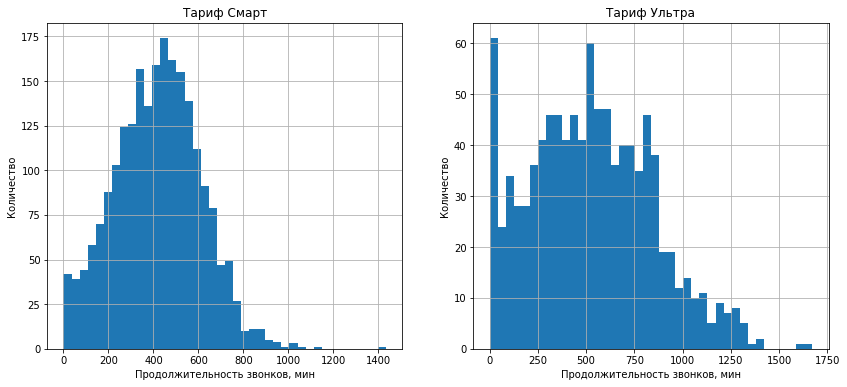

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.hist(data.loc[data['tariff'] == 'smart','calls_minutes'], bins=40)
ax1.grid(True)
ax1.set_title('Тариф Смарт')
ax1.set_xlabel('Продолжительность звонков, мин')
ax1.set_ylabel('Количество')
ax2.hist(data.loc[data['tariff'] == 'ultra','calls_minutes'], bins=40)
ax2.grid(True)
ax2.set_title('Тариф Ультра')
ax2.set_xlabel('Продолжительность звонков, мин')
ax2.set_ylabel('Количество')
plt.show();

Продолжительность звонков месяц имеет нормальное распределение и скошена в обоих случаях влево.
Пользователи тарифа Ультра имеют большое количество пропущенных звонков - предположительно, данный тариф используют люди, которым приходится много общаться по работе, возможно они не могут отвечать на каждый звонок.

### Анализ использования sms

In [22]:
data.pivot_table(index='month', columns='tariff', values=['messages_count'], aggfunc=['mean', var1, std1, min, max])

mean                      var1                        std1  \
       messages_count            messages_count              messages_count   
tariff          smart      ultra          smart        ultra          smart   
month                                                                         
1           18.235294  33.777778     262.367201   940.694444      16.197753   
2           24.086207  21.958333     473.097701   716.824275      21.750809   
3           31.857143  32.297297     718.492481  1732.381381      26.804710   
4           30.741071  31.563636     602.139559  1407.287542      24.538532   
5           33.773050  37.850746     730.990983  1624.644052      27.036845   
6           33.402439  41.726190     806.806374  1986.297619      28.404337   
7           33.751244  49.846154     799.887811  2372.042735      28.282288   
8           33.638298  48.439252     838.257501  2171.739199      28.952677   
9           33.638462  52.286957     790.617820  2152.855530      28.117927   
10          33.765306  58.430894     816.111966  2697.181661      28.567673   
11          34.075949  55.791045     805.937071  2476.948491      28.389031   
12          35.994065  60.611511     934.952346  2681.978417      30.576990   

                             min                  max        
                  messages_count       messages_count        
tariff      ultra          smart ultra          smart ultra  
month                                                        
1       30.670742              0     0             74    75  
2       26.773574              0     0             85    90  
3       41.621886              0     0            110   155  
4       37.513831              0     0            105   143  
5       40.306874              0     0            103   148  
6       44.567899              0     0            134   201  
7       48.703621              0     0            137   211  
8       46.601923              0     0            134   180  
9       46.398874              0     0            136   188  
10      51.934398              0     0            139   223  
11      49.768951              0     0            124   197  
12      51.787821              0     0            143   224

В среднем в месяц пользователи тарифа "Ультра" отправляют немного больше sms, чем пользователи тарифа "Смарт". Пользователи тарифа "Ультра" никогда не выбирают лимит в 1000 sms.

In [23]:
data.pivot_table(index='tariff', values=['messages_count'], aggfunc=['sum','mean', var1, std1, min, max])

,sum,mean,var1,std1,min,max
,messages_count,messages_count,messages_count,messages_count,messages_count,messages_count
tariff,,,,,,
smart,74413,33.384029,796.812958,28.227876,0,143
ultra,48623,49.363452,2285.266143,47.804457,0,224


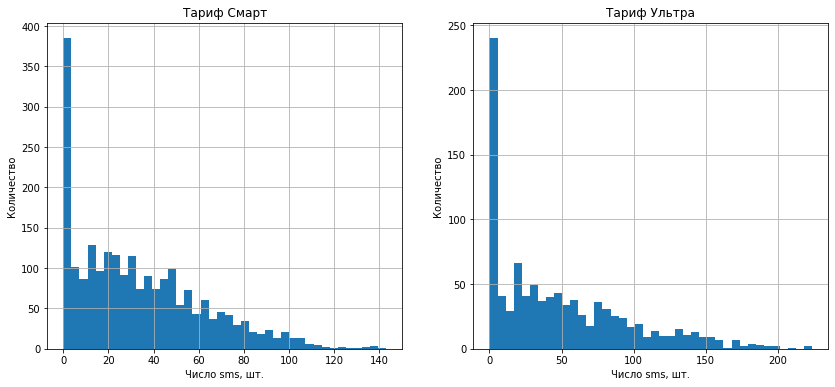

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.hist(data.loc[data['tariff'] == 'smart','messages_count'], bins=40)
ax1.grid(True)
ax1.set_title('Тариф Смарт')
ax1.set_xlabel('Число sms, шт.')
ax1.set_ylabel('Количество')
ax2.hist(data.loc[data['tariff'] == 'ultra','messages_count'], bins=40)
ax2.grid(True)
ax2.set_title('Тариф Ультра')
ax2.set_xlabel('Число sms, шт.')
ax2.set_ylabel('Количество')
plt.show();

Sms одинаково непопулярны в обоих группах пользователей. Распределения похожи на распределения Пуассона.

### Анализ использования мобильного интернета

In [25]:
data.pivot_table(index='month', columns='tariff', values=['traffic_gb'], aggfunc=['mean', var1, std1, min, max]) 

mean                  var1                   std1             \
       traffic_gb            traffic_gb             traffic_gb              
tariff      smart      ultra      smart       ultra      smart      ultra   
month                                                                       
1        8.735294  13.222222  39.412656   44.444444   6.277950   6.666667   
2       11.844828  12.000000  37.150938  109.130435   6.095157  10.446551   
3       15.233766  17.648649  32.549897  114.345345   5.705252  10.693238   
4       13.625000  16.963636  31.299550   89.443098   5.594600   9.457436   
5       15.907801  19.373134  34.370010   95.631389   5.862594   9.779130   
6       15.951220  18.940476  31.911716   82.394005   5.649046   9.077114   
7       15.875622  20.505495  33.419453   96.430525   5.780956   9.819905   
8       16.736170  19.598131  30.041207  105.148298   5.480986  10.254184   
9       16.392308  19.243478  25.884110   86.255988   5.087643   9.287410   
10      16.880952  20.065041  32.897042   91.258030   5.735594   9.552907   
11      17.000000  19.805970  27.180952   93.796656   5.213535   9.684867   
12      18.201780  21.741007  29.786544  103.236784   5.457705  10.160550   

              min              max        
       traffic_gb       traffic_gb        
tariff      smart ultra      smart ultra  
month                                     
1               1     1         24    20  
2               1     0         28    32  
3               2     3         25    37  
4               1     1         27    37  
5               1     0         30    43  
6               1     0         34    42  
7               1     0         29    45  
8               0     0         31    48  
9               1     0         31    42  
10              0     0         32    49  
11              1     0         36    44  
12              5     0         38    43

Интернет-трафик используется активно пользователями обоих тарифов. В среднем, пользователям тарифа "Смарт" месячного объёма трафика не хватает. Пользователи тарифа "Ультра" в целом не перебирают отведёный им объём.

In [26]:
data.pivot_table(index='tariff', values=['traffic_gb'], aggfunc=['sum','mean', var1, std1, min, max])

,sum,mean,var1,std1,min,max
,traffic_gb,traffic_gb,traffic_gb,traffic_gb,traffic_gb,traffic_gb
tariff,,,,,,
smart,36397,16.328847,33.028705,5.747061,0,38
ultra,19202,19.494416,97.091686,9.853511,0,49


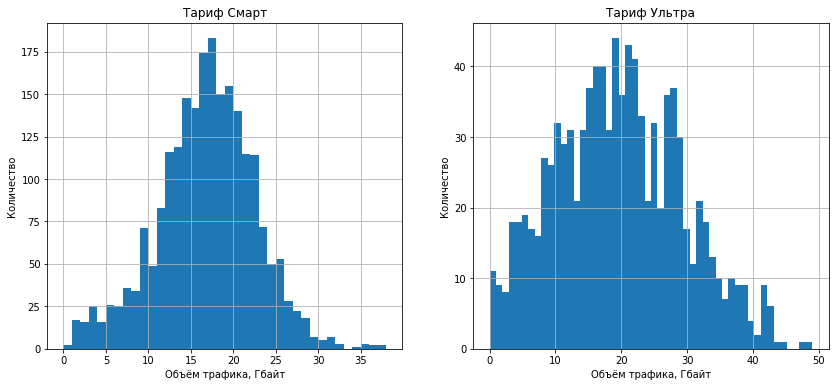

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.hist(data.loc[data['tariff'] == 'smart','traffic_gb'], bins=38)
ax1.grid(True)
ax1.set_title('Тариф Смарт')
ax1.set_xlabel('Объём трафика, Гбайт')
ax1.set_ylabel('Количество')
ax2.hist(data.loc[data['tariff'] == 'ultra','traffic_gb'], bins=50)
ax2.grid(True)
ax2.set_title('Тариф Ультра')
ax2.set_xlabel('Объём трафика, Гбайт')
ax2.set_ylabel('Количество')
plt.show();

Объём трафика для обоих тарифов имеет нормальное распределение, скошенное влево. 

### Анализ выручки

In [28]:
data.pivot_table(index='month', columns='tariff', values=['earnings'], aggfunc=['mean', var1, std1, min, max]) 

mean                       var1                        std1  \
           earnings                   earnings                    earnings   
tariff        smart        ultra         smart          ultra        smart   
month                                                                        
1        721.323529  1950.000000  1.925162e+05       0.000000   438.766641   
2        827.603448  1975.000000  2.923587e+05    7173.913043   540.702011   
3       1164.623377  2014.864865  4.872390e+05   43175.675676   698.025091   
4        963.089286  2001.818182  3.159166e+05   38515.151515   562.064543   
5       1197.510638  2059.701493  5.226902e+05  162669.606513   722.973153   
6       1204.018293  2039.285714  5.561252e+05   99823.580034   745.738005   
7       1223.950249  2118.131868  5.453382e+05  198917.582418   738.470208   
8       1320.595745  2083.177570  6.276194e+05  159761.505907   792.224318   
9       1249.946154  2024.347826  5.366885e+05   60937.070938   732.590262   
10      1364.853741  2065.853659  7.102664e+05  149685.125950   842.773037   
11      1343.047468  2092.164179  6.331858e+05  167588.514196   795.729727   
12      1578.531157  2138.848921  1.070678e+06  232610.259618  1034.735951   

                        min              max          
                   earnings         earnings          
tariff       ultra    smart   ultra    smart   ultra  
month                                                 
1         0.000000    550.0  1950.0   2350.0  1950.0  
2        84.698955    550.0  1950.0   3432.0  2250.0  
3       207.787573    550.0  1950.0   2721.0  3000.0  
4       196.252775    550.0  1950.0   2950.0  3000.0  
5       403.323204    550.0  1950.0   3550.0  3900.0  
6       315.948698    550.0  1950.0   4473.0  3750.0  
7       446.001774    550.0  1950.0   3350.0  4200.0  
8       399.701771    550.0  1950.0   4427.0  4650.0  
9       246.854352    550.0  1950.0   3759.0  3750.0  
10      386.891620    550.0  1950.0   4231.0  4800.0  
11      409.375762    550.0  1950.0   5680.0  4050.0  
12      482.296858    550.0  1950.0   6770.0  3900.0

In [29]:
data.pivot_table(index='tariff', values=['earnings'], aggfunc=['sum','mean', var1, std1, min, max])

,sum,mean,var1,std1,min,max
,earnings,earnings,earnings,earnings,earnings,earnings
tariff,,,,,,
smart,2875351.0,1289.973531,669785.708006,818.404367,550.0,6770.0
ultra,2039100.0,2070.152284,141516.745079,376.187114,1950.0,4800.0


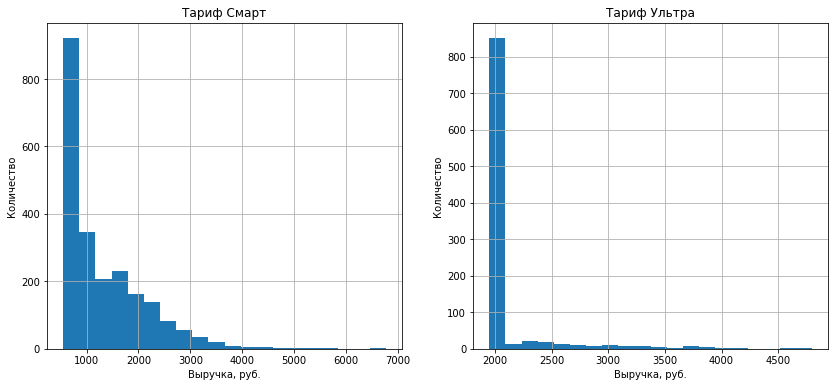

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.hist(data.loc[data['tariff'] == 'smart','earnings'], bins=20)
ax1.grid(True)
ax1.set_title('Тариф Смарт')
ax1.set_xlabel('Выручка, руб.')
ax1.set_ylabel('Количество')
ax2.hist(data.loc[data['tariff'] == 'ultra','earnings'], bins=20)
ax2.grid(True)
ax2.set_title('Тариф Ультра')
ax2.set_xlabel('Выручка, руб.')
ax2.set_ylabel('Количество')
plt.show();

## Проверка гипотез

### Средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются

Нулевая гипотеза "Средняя выручка пользователей тарифов "Ультра" и "Смарт" одинаковая"

Альтернативная гипотеза "Средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются"

In [31]:
# предел статистической значимости установим на уровне 1%
alpha = 0.01
results = st.ttest_ind(data[data['tariff'] == 'smart']['earnings'], data[data['tariff'] == 'ultra']['earnings'])
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Так как нулевую гипотезу мы отвергли, то нам не удалось отвергнуть альтернативную гипотезу, что средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются.

### Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза "Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов"

Альтернативная гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

In [32]:
data.loc[data['user_id'].isin(users[users['city'] == 'Москва'].index), 'city'] = 'Москва'

In [33]:
data['city'].fillna('Регионы', inplace=True)

In [34]:
# предел статистической значимости установим на уровне 1%
alpha = 0.01
results = st.ttest_ind(data[data['city'] == 'Москва']['earnings'], data[data['city'] == 'Регионы']['earnings'])
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение 0.5440152911670224
Не удалось отвергнуть нулевую гипотезу


Различие между средними по выручке Москвы и регионов с вероятностью в 48% можно получить случайно. Слишком большая вероятность, чтобы говорить о значимом различии.

## Итоговый вывод

В рамках проведенного анализа тарифов "Смарт" и "Ультра" установлено, что:
1. Пользователи обоих тарифов активно пользуются исходящими вызовами, при этом:
    1. Пользователям тарифа "Смарт" с большой долей вероятности не хватит отведенных им 500 минут в месяц.
    2. Пользователи тарифа "Ультра" скорее всего не используют заложенные в пакет 3000 минут.
2. Пользователи обоих тарифов отправляют мало смс. Скорее всего, большая часть переписки идёт через мессенджеры. 1000 сообщений в пакете "Ультра" также с большой долей вероятности не будут использованы.
3. Пользователи обоих тарифов активно используют мобильный интернет, при этом:
    1. Пользователи тарифа Смарт с большой долей вероятности используют больше 15 Гбайт трафика.
    2. Пользователи тарифа Ультра также нередко выбирают 30 Гбайт трафика
4. Пользователи тарифа "Смарт" гораздо чаще пользуются услугами сверх пакета
5. Различие между средними по выручкам в тарифах "Ультра" и "Смарт" не является случайным. В среднем траты пользователя тарифа "Смарт" ниже, чем пользователя тарифа "Ультра", но больше абонентской платы. 
6. Различие между средним по выручкам по Москве и регионами с вероятностью 48% является случайным.

7. **Если судить строко по выручке, то тариф Смарт выгоднее, НО:**
    1. **Для того, чтобы корректно выбрать тариф, который следует развивать, нам всё же необходимо знать, стоимость обслуживания одного клиента на каждом из тарифов + расходы на привлечение новых клиентов также по каждому из тарифов.**
    2. **С точки зрения клиентского опыта оба тарифа невыгодны (несбалансированы): лимитов тарифа Смарт явно недостаточно, и клиенты переплачиват сверх пакета; пользователям тарифа Ультра ни к чему такой объём минут и sms. Это может привести к оттоку клиентов.** 
    3. **Логичнее вместо развития существующих тарифов предложить клиентам новый тариф с упором на интернет трафик, так как данная опция была бы более востребована.**